# **Introduction to Deep Learning**

<img src="https://incubator.ucf.edu/wp-content/uploads/2023/07/artificial-intelligence-new-technology-science-futuristic-abstract-human-brain-ai-technology-cpu-central-processor-unit-chipset-big-data-machine-learning-cyber-mind-domination-generative-ai-scaled-1-1500x1000.jpg" width="600"/>


<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2025/blob/main/ml-foundations-prac-1/Introduction_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2025. Apache License 2.0.

**Authors:** ...

**Reviewers:** ...

**Introduction:**

In this tutorial, we will explore the fundamental concepts that underpin deep learning. You will learn how to build and train deep learning (DL) models from scratch using numpy. We will then conclude by demonstrating how to train larger models efficiently using specialized DL frameworks such as JAX.

**Topics:**

Content: <font color='green'>`Numerical Computing`</font> , <font color='orange'>`Supervised Learning`</font>  
Level: <font color='grey'>`Beginner`</font>


**Aims/Learning Objectives:**

- Understand high-level concepts in machine learning, including data, models, and learning.
- Get an overview of key terminology in modern machine learning.
- Learn how to implement and train deep learning models using NumPy.
- Learn how to scale and train larger models using JAX.

**Prerequisites:**

- Basic knowledge of [NumPy](https://github.com/numpy/numpy).
- Basic knowledge of [functional programming](https://en.wikipedia.org/wiki/Functional_programming).

**Outline:**
>[Introduction to Deep Learning](#scrollTo=7ub_WZ6A88_e)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>[Part 1 - What is Machine Learning - 25 minutes ⏰](#scrollTo=cMhBHaeYEn9t)

>>[💻Introduction and Motivation](#scrollTo=OueV4gWwEn9u)

>>>[Is it a 1 or a 7?](#scrollTo=OueV4gWwEn9u)

>>>[What is Machine Learning?](#scrollTo=DIe8aXmGrWEL)

>>[1.1 Data](#scrollTo=YcXv8nydNjwL)

>>[1.2 Models](#scrollTo=S586n3hEEn9z)

>>[1.3 Learning](#scrollTo=W0hbEofBQOn8)

>>>[Loss Function](#scrollTo=W0hbEofBQOn8)

>>>[Learning Algorithm](#scrollTo=W0hbEofBQOn8)

>>>[Generalization](#scrollTo=W0hbEofBQOn8)

>>[1.4 Types of machine learning problems](#scrollTo=Y71M5dCdEn9z)

>>[1.5 Modern Terminology](#scrollTo=_ssdwdCLEn9z)

>[Part 2 - Building a Deep Learning Model from scratch - 45 minutes ⏰](#scrollTo=Enx0WUr8tIPf)

>>[2.1 What is a Neural Network?](#scrollTo=B_ZUCGGbpkwV)

>>[2.2 Activation Functions](#scrollTo=_GLH0mPpqTet)

>>[2.3 Forward Propagation](#scrollTo=UvjplT3PqssE)

>>[2.4 Loss functions](#scrollTo=RZcW6glVq-QM)

>>[2.5 Backpropagation](#scrollTo=migTukJerZhO)

>>[2.6 Optimization](#scrollTo=pCTVMR4tvIvS)

>>[2.7 Putting it all together](#scrollTo=Si86A1wbv6dg)

>[Part 3 - Building bigger models using specialied DL framworks - 30 minutes ⏰](#scrollTo=aB0503xgmSFh)

>>[3.1 Brief Introduction to JAX](#scrollTo=DG5ZkS3C4auq)

>>[3.2 Re-Implemeting our Model in JAX](#scrollTo=_pANISs05iHL)

>>[3.3 Automatic differentiation with JAX](#scrollTo=R56u9v1v6Grn)

>>[3.4 Training and Evaluation](#scrollTo=gq_ZRdUa6otr)

>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>[Appendix:](#scrollTo=XrRoSqlxfi7f)

>>[Derivation of partial derivatives for Exercise 2.4](#scrollTo=9OH9H7ndfuyQ)

>[Feedback](#scrollTo=o1ndpYE50BpG)


**Before you start:**

Run the "Installation and Imports" cell.


## Installation and Imports

In [7]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

!pip install --quiet -U pandas jax matplotlib scikit-learn ipywidgets flax
!pip install openml --quiet

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, pmap
from typing import NamedTuple, Any, Dict

import matplotlib.pyplot as plt
import numpy as np
import openml
import pandas as pd
import seaborn as sns

# download Mnist and store it at ~/scikit_learn_data for offline use
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
# @title Check the device you are using (Run Cell)
print(f"Num devices: {jax.device_count()}")
print(f" Devices: {jax.devices()}")

# **Part 1 - What is Machine Learning** - 25 minutes ⏰


## 💻**Introduction and Motivation**

### Is it a 1 or a 7?
Imagine you had to design a system that detects text from people's handwriting. Could you code this up from first principles? This problem is really challenging! Even identifying just numbers is tough since each digit can be written in countless ways.

If you are stuck, do not worry, this is a challenging problem to solve. The key insight is that, while defining rules to recognize handwritten digits is difficult, you already have the ability to do this. You can look at a handwritten number and tell what number it is. With this ability, you can collect a large dataset of handwritten digits and label this dataset with the correct numbers. Using this dataset, you can train a machine learning model to do the task -- the same task that would be really challenging to do using rules.  



**Exercise 1.1** Let's play a digit guessing game to simulate what we discussed above! Can you identify these digits? Do you think this is hard for a computer to do?

In [ ]:
## Hide code.
# @title Helper functions. (Run Cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from ipywidgets import widgets, HBox, VBox
from IPython.display import display, HTML
import io

# Function to display an image and get user input
def display_and_guess(x_train, y_train, question, options, interactive=True):
    idx = np.random.randint(0, len(x_train))
    image = x_train[idx]
    label = y_train.iloc[idx]

    # Create the image
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(question, fontsize=12)

    if interactive:
        # Convert plot to image
        buf = io.BytesIO()
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = widgets.Image(value=buf.getvalue(), format='png')
        plt.close(fig)

        output = widgets.Output()

        def on_button_click(b):
            with output:
                output.clear_output()
                if b.description == str(label):
                    display(HTML(f'<p style="color:green; font-size:12px;"><b>Correct! 🎉</b></p>'))
                else:
                    display(HTML(f'<p style="color:red; font-size:12px;"><b>Incorrect. It was a \'{label}\'. 😔</b></p>'))

        # Create buttons dynamically based on the provided options
        buttons = [widgets.Button(description=str(option), button_style='info', layout=widgets.Layout(width='40px')) for option in options]
        for button in buttons:
            button.on_click(on_button_click)

        return VBox([img, HBox(buttons), output])

    else:
        plt.show()
        # Non-interactive fallback for VSCode notebooks or other environments
        user_input = input(f"{question} Enter your guess {options}: ")
        if user_input == str(label):
            print("Correct! 🎉")
        else:
            print(f"Incorrect. It was a '{label}'. 😔")

def numbers_recognition_game(rounds=2, interactive=True):

    # Play the game for a few rounds
    display(HTML('<h1 style="text-align:center;">Let\'s play a digit guessing game!</h1>'))

    # Load the MNIST dataset
    print("Loading MNIST dataset...")
    mnist = fetch_openml('mnist_784', version=1, data_home="~/scikit_learn_data")
    X = mnist['data'].values.reshape(-1, 28, 28)
    y = mnist['target'].astype(int)

    # Prepare datasets for '1' vs '7' and '0' vs '6'
    datasets = {
        "1 vs 7": (X[np.where((y == 1) | (y == 7))[0]], y.iloc[np.where((y == 1) | (y == 7))[0]]),
        "0 vs 6": (X[np.where((y == 0) | (y == 6))[0]], y.iloc[np.where((y == 0) | (y == 6))[0]])
    }

    for _ in range(rounds):
        row = []
        for question, (x_train, y_train) in datasets.items():
            options = [int(digit) for digit in question.split(" vs ")]
            row.append(display_and_guess(x_train, y_train, f"Is this a {question}?", options, interactive))

        # Add a third column with a random question
        random_question = np.random.choice(list(datasets.keys()))
        x_train, y_train = datasets[random_question]
        options = [int(digit) for digit in random_question.split(" vs ")]
        row.append(display_and_guess(x_train, y_train, f"Is this a {random_question}?", options, interactive))

        if interactive:
            display(HBox(row))

    display(HTML('<h2 style="text-align:center;">Thanks for playing!</h2>'))

In [ ]:
numbers_recognition_game(rounds=2, interactive=True)

How did you do? You might have gotten easy or hard numbers to distinguish, but think about all the possible handwriting styles out there.

In the next section, we discuss Machine learning (ML), a technique which you could use to teach a computer to play this game.

If no images were displayed, make sure you have `ipywidgets` installed, or run `numbers_recognition_game(rounds=2, interactive=False)`.

### **What is Machine Learning?**

Machine learning (ML) is about designing algorithms that automatically extract useful information from data ([mathematics for machine learning](https://mml-book.github.io/)). Instead of explicitly programming every rule, ML allows the computer to learn from data and make predictions or decisions based on what it has learned.

In ML, there are three main components: data, models, and learning.

🔑 **Key Components**

- **Data**: These are generally a collection of examples that we want to learn from.
- **Models**: Functions that take data as input and produce predictions or decisions as output. These models are controlled by parameters, which are like adjustable knobs that determine how the model behaves.
- **Learning**: The process of adjusting the model's parameters to improve its performance on a specific task.

## 1.1 **Data**

ML is about finding patterns in data, which can take various forms such as images, text, audio, and more. For computers to process and analyze this data, it must be represented numerically, often as vectors (which are like lists of numbers) or matrices (which are like grids of numbers). For example, an image can be represented as a grid where each cell contains a pixel value, reflecting the brightness or colour at that point, the number 0 can be used for black and 255 for white, and the numbers in between can represent varying brightness from black to white.

**Understanding Inputs and Labels:**

In a machine learning task, our data typically consists of two main components: inputs (also called features) and labels. The input is the information we have and use to make predictions. The label is the outcome we want to predict.

For example, in a digit recognition task:

- The **input** would be an image of a handwritten digit.
- The **label** would be the actual digit that the image represents (e.g., 0, 1, 2, ..., 9).

**Supervised Learning and Datasets:**

In supervised learning, the most common type of machine learning, we work with input-output pairs. Each pair consists of an input and its corresponding label, and each pair is referred to as a sample. Collectively, these samples form a dataset.

We use this dataset to train an ML model. The model learns from the patterns in the input-output pairs and uses this knowledge to make predictions on new, unseen inputs. The goal is to create a model that can accurately predict the output (label) when given a new input, even if it hasn't seen that specific example before.

🎯 **Task: Predicting energy efficiecy for different building types**

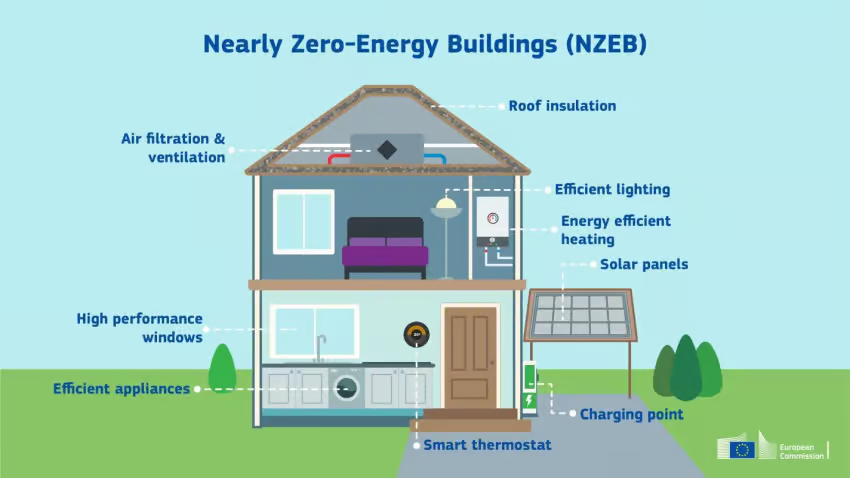

Credit: [European Commision](http://cosmosmagazine.com/science/home-construction-energy-efficient/)
  
We currently live in an era where almost everything is recorded — an age often referred to as the Big Data Era. As a result, machine learning models are being applied across countless fields to make the most of this data and optimize systems wherever possible.

Africa is a continent under rapid development, with new buildings rising every day. But have we ever stopped to ask: Are these buildings designed to optimize energy efficiency?

That’s the challenge we’ll explore today. Using a well-curated dataset of buildings with different architectural features and shapes, we will build a machine learning model to predict the energy efficiency of a building — specifically, how much energy is required to heat or cool it.:

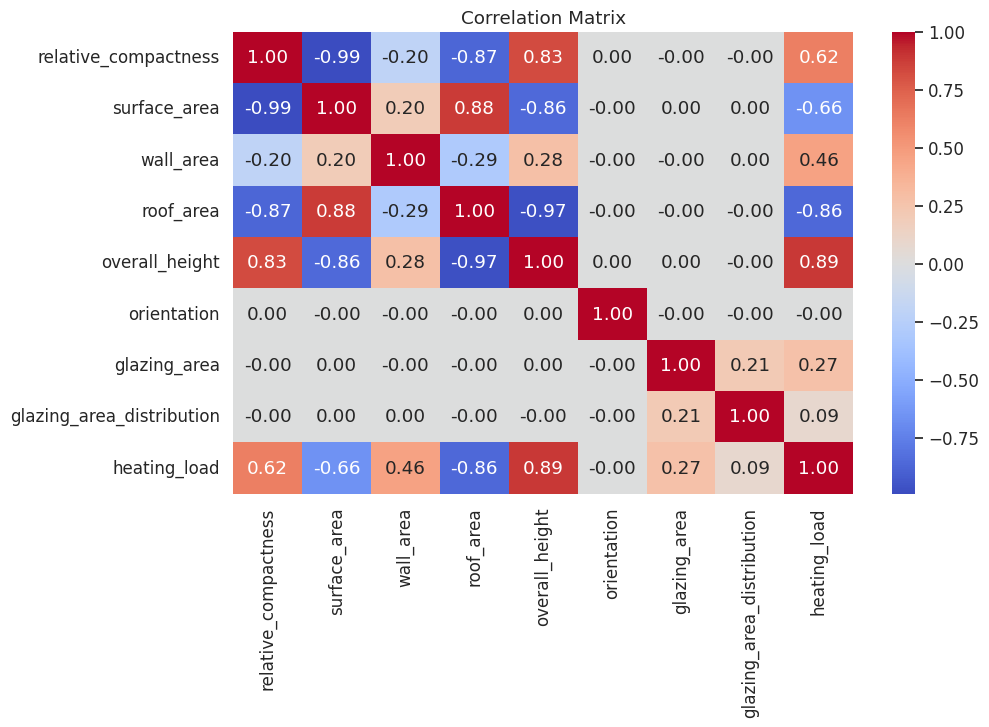

In [20]:
## Hide code.
# @title Let's the Visualise data. (Run Cell)

# Load dataset
dataset = openml.datasets.get_dataset(44960)
X, y, *_ = dataset.get_data(target="heating_load", dataset_format="dataframe")

# Combine features and target for easier plotting
df = X.copy()
df['heating_load'] = y

# Set up seaborn theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 2. Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


This dataset consists of 8 building features and 1 target variable — the heating load, which measures the energy required to heat the building. As shown in the plots, some features are highly correlated with each other, while others show little to no correlation.

With traditional machine learning algorithms, we would typically spend a significant amount of time exploring and engineering features before training a model. However, deep learning models have the ability to automatically learn and prioritize the most relevant features for the task, reducing the need for extensive manual feature selection.

## 1.2 **Models**

Models transform data in useful ways. They take input data and produce the desired output. Formally, a model is a function $f(x)$ that maps input data $x$ (a sample from our dataset) to output data $y$ (the label). For example, in our energy prediction dataset, the input is a vector of different measurements from the building such as surface area, compactness, orientation, height, etc., and the output is the predicted heating load.

The model's behaviour is controlled by parameters, which are adjustable values updated during the learning process.

## 1.3 **Learning**

**Learning** is the process of improving a model's performance by updating its parameters. This improvement is guided by an **objective function**, often called the **loss function**, which measures how well the model is performing.

### Loss Function

The **loss function**, denoted as $ L $, quantifies the difference between the model's prediction $ f(x) $ and the actual outcome $ y $. It outputs a number that represents how close the prediction is to the actual outcome.

- **Prediction**: $ f(x) $
- **Actual Outcome**: $ y $
- **Loss Function**: $ L(f(x), y) $

The goal of learning is to **minimize** this loss function. Although we could also maximize the loss function in theory, minimizing it is the conventional approach.

### Learning Algorithm

The **learning algorithm** is responsible for adjusting the model's parameters to minimize the loss function. Intuitively, you can think of learning as **tuning** the model's knobs (parameters) to get the desired behaviour. The learning algorithm does the tuning, while the loss function tells us *how well the tuning is working*.

Formally, learning involves finding the parameters $\theta$ of our model $f$ that minimize the loss function $L$ over the dataset $X$:

Minimize $L(f(x; \theta), y)$ over  $X$.

### Generalization

Our goal is not only to perform well on the training data but also to ensure that the model generalizes well to new, unseen data. This aspect will be discussed in more detail in Part 3.

Learning can occur in various settings. We will explore the main types of learning in the next section.

**Exercise 1.2**: Which of the following best describes the core principle of machine learning?

(*Discuss with your neighbours*).

**a**) Writing complex algorithms to solve specific problems.

**b**) Manually programming rules for every possible scenario.

**c**) Allowing computers to learn from data without being explicitly programmed.

**d**) Developing AI that can mimic human thought processes.

In [ ]:
selection = "a"  # @param ["a", "b", "c", "d"]
print(f"You selected: {selection}")

correct_answer = "c"
if selection != correct_answer:
  print("Incorrect answer, the correct answer is C. ML brings a paradigm shift in how we approach problem-solving with computers. Instead of manually programming every rule, machine learning allows computers to learn patterns and make decisions based on data.")
else:
  print("Nice, you got the correct answer!")

## **1.4 Types of machine learning problems**

Broadly speaking, machine learning tasks can be classified into three categories.

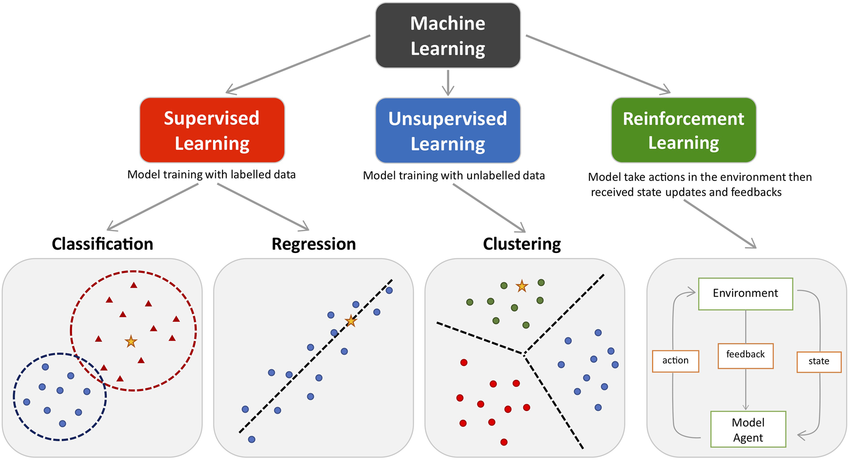

[Image Source](https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png).

**Supervised Learning:** *In supervised learning, the algorithm is trained on a labelled dataset, where each input data point is paired with the correct output (label).* The goal is to learn a mapping from inputs to outputs based on the training data. Once trained, the model can make accurate predictions on new, unseen data. This approach is commonly used for tasks like classification and regression, where the correct answers are known during training.

**Unsupervised Learning:** *In unsupervised learning, the algorithm works with an unlabeled dataset, meaning the data has no predefined labels or outcomes.* The objective is to discover patterns, structures, or relationships within the data. This might involve grouping similar data points (clustering) or reducing the dimensionality of the data to uncover hidden patterns. Unsupervised learning is often used in exploratory data analysis and for finding natural groupings in data.

**Reinforcement Learning:** *In reinforcement learning, the algorithm learns to make decisions by interacting with an environment.* The learner, known as the *agent*, takes actions and receives feedback in the form of rewards or penalties. The goal is to learn a strategy, or *policy*, that maximizes the cumulative reward over time. Reinforcement learning is commonly applied in areas like robotics, game playing, and autonomous systems, where an agent must learn to navigate complex environments.

**Exercise 1.3**: Can you identify to which of the categories the following task belongs?
  - Teaching a robot how to walk.
  - Weather prediction.
  - Spam email classification.
  - Teach a computer how to play chess.
  - Grouping together different kinds of movie reviews.

In [ ]:
# @title Solution - Exercise (Try not to peek until you've given it a good try!')
print("Teaching a robot how to walk -- Reinforcement learning")
print("Weather prediction -- Supervised learning")
print("Spam email classification -- Supervised learning")
print("Teach a computer how to play chess -- Reinforcement learning")
print("Grouping together different kinds of movie reviews -- Unsupervised learning")

## **1.5 Modern Terminology**

In recent years, several new concepts and terms have emerged in ML. We will briefly discuss some of these modern terminologies that might be relevant to your learning journey:

<details>
  <summary><strong>General Terminology (Click Me)</strong></summary>

  - **Deep learning**: A branch of ML that uses neural networks (think of these as expressive models from 1.2) with many layers to learn complex patterns in data. These networks are especially good at handling large, unstructured data like images, audio, and text. Deep learning has made significant advances in areas like image recognition and language processing. We’ll dive deeper into this topic in Part 3.
  - **Self-supervised learning**: A learning approach where the model learns from the data itself without requiring explicit labels. The model is trained to predict certain parts of the input data based on other parts, effectively creating its own supervision signal. This is different from supervised learning, where the model learns from labelled examples provided by humans, and unsupervised learning, where the model learns patterns from unlabeled data. Self-supervised learning has gained popularity due to its ability to leverage large amounts of unlabeled data for training.
</details>

<details>
  <summary><strong>Generative-modelling Terminology (Click Me)</strong></summary>

  - **Generative vs Discriminative Models**: Generative models create new data similar to existing data (like generating new images) by learning the underlying data distribution. In contrast, discriminative models classify or distinguish between different types of data (like classifying images). Examples of generative models include Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs), and Autoregressive Models, useful for tasks like image and text generation.
  - **Autoregressive Models**: These models generate sequences by predicting the next element based on previous ones. They're commonly used in text generation, music composition, and time series forecasting. **Large Language Models (LLMs)** like GPT-3 use this approach, predicting the next word in a sentence based on the previous words. **Transformers**, a type of neural network used in LLMs, excel at processing sequences in parallel. If you want to learn more, check out the [LLM 2023](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/large_language_models.ipynb) and [2024 practicals](https://github.com/deep-learning-indaba/indaba-pracs-2024/tree/main).

  - **Diffusion models**: These models generate data by reversing a process of adding noise. For example, they start with a noisy image and learn to remove the noise to produce a clear image. Diffusion models have been successful in generating high-quality images, with examples like Imagen and DALL-E. For more details, explore the [diffusion practical](https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Diffusion_Models/Diffusion_Models.ipynb).
</details>

# **Part 2 - Building a Deep Learning Model from scratch** - 45 minutes ⏰

A neural network is a type of machine learning algorithm inspired by the human brain. It’s a powerful tool that excels at solving complex problems more difficult for traditional computer algorithms to handle, such as image recognition and natural language processing.

## 2.1 **What is a Neural Network?**


Imagine you're trying to teach a computer to tell the difference between a picture of a cat and a dog. How would you do it? You can't just list a bunch of rules like "if it has pointy ears, it's a cat" because some dogs have pointy ears too!

This is where deep learning models come in. They're a special kind of computer program that learns in a way that's inspired by how our own brains learn. Think of them as incredibly smart students that learn by looking at tons and tons of examples.

**Aha, can you be more specific?**

 It learns features directly from the data, making it better suited for large datasets. However, in traditional machine learning, features are manually provided.

Let's deep dive it:

<a href="https://www.researchgate.net/figure/Comparison-of-the-traditional-programming-approach-and-ML-Top-Traditional-programming_fig1_359415194"><img src="https://www.researchgate.net/profile/Randa-Natras/publication/359415194/figure/fig1/AS:1136745416531970@1648032635593/Comparison-of-the-traditional-programming-approach-and-ML-Top-Traditional-programming.ppm" alt="Comparison of the traditional programming approach and ML. Top: Traditional programming approach, where the computer is supplied with input data and an explicitly specified extensive list of rules. Bottom: ML approach, where in the training phase, the computer is supplied with prepared examples of inputs and outputs (training data) and rules are learned from the data. In the next step of the model prediction (test data and model deployment phase), new input data (unseen during the training phase) is fed into the ML model that contains already learned ruled. Results are predicted values, in this case, the forecast of the VTEC in the ionosphere."/></a>


In contrast to traditional programming, ML in general works the following: Instead of being explicitly programmed with fixed rules, ML models take raw input data and learn the underlying "functions" that map this input to desired outputs, often predicting or classifying new, unseen data. This adaptive learning process allows them to continuously improve their performance as they are exposed to more data.


* Nodes (Neurons): The fundamental computational units that receive inputs, perform a weighted summation of those inputs, apply an activation function, and produce an output.

* Connections (Edges/Synapses): Directed links between nodes, each associated with a weight that modulates the strength of the signal passed from one node to the next. These weights are the primary parameters adjusted during training.

* Biases: An additional, learnable parameter associated with each neuron that allows the activation function to be shifted, providing more flexibility in modeling.

- Layers:

1- **Input Layer:** Receives the initial raw data features.

2- **Hidden Layers:** One or more intermediate layers responsible for extracting hierarchical features and learning complex representations of the input data through non-linear transformations.

3- **Output Layer:** Produces the final prediction or classification based on the computations performed by the preceding layers.

![NN](https://cf-assets.www.cloudflare.com/slt3lc6tev37/1wkNx98skWwkKAw2XExpQe/33505b0b82e3156fc042bca42a1a2034/neural-network-diagram.png)



Types of neural networks
We categorize neural networks based on their architecture, training methods, and uses. Common types include:



* Feedforward Neural Networks: This basic type processes data linearly from input to output, without loops. They're commonly used for straightforward tasks like classification and regression.

* Recurrent Neural Networks (RNNs): Designed for sequential data like time series or natural language, RNNs use a feedback loop to retain memories of previous inputs, making them suitable for data with a time component.

* Convolutional Neural Networks (CNNs): Specifically designed for image-related tasks, CNNs extract features from images using a convolutional layer, which identifies patterns like edges and shapes.

* Generative Adversarial Networks (GANs): Composed of a generator and a discriminator, GANs pit these two components against each other. The generator creates data while the discriminator assesses its authenticity. This adversarial process results in the generator producing increasingly realistic data, often used for generating images, videos, and audio.




## Image recognition 
As the image is a collection of pixel values in matrix, we will create a simple dataset for the letters A, B, and C using binary matrices. These matrices represent pixel values of 5x6 grids for each letter, along with corresponding one-hot encoded labels y for use in a classification task.

In [1]:
# Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

To visualize the datasets, we can use Matplotlib to plot the images for each letter. This will give us a clear understanding of what the data looks like before feeding it into the neural network.

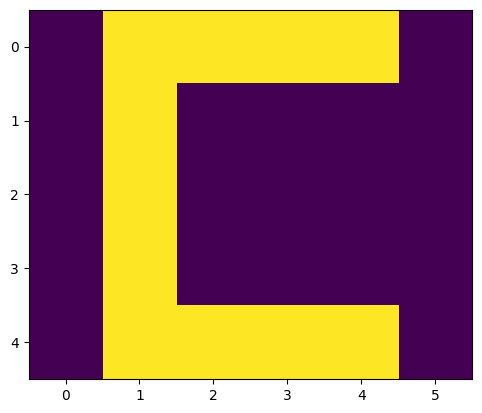

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# visualizing the data, plotting A.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

## Task

Convert the matrices above int numpy arrays, use np.arryay() and reshape it to (1,30) dimentions.

In [ ]:
# converting data and labels into numpy array
x = ...##[a,b,c]
y = ...

## Solution

In [3]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
                                np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## 2.2 **Activation Functions**

While building a neural network, one key decision is selecting the Activation Function for both the hidden layer and the output layer. It is a mathematical function applied to the output of a neuron. It introduces non-linearity into the model, allowing the network to learn and represent complex patterns in the data. Without this non-linearity feature a neural network would behave like a linear regression model no matter how many layers it has.

Simply put, an activation function decides whether a neuron should be activated. It uses simple mathematical operations to conclude the importance of the current neuron’s input to the neural network.

Two types of Activation functions: 

* Linear Activation Function
* Non Linear Activation Function


### Relu 
The ReLU (Rectified Linear Unit) activation function is one of the most commonly used activation functions in neural networks. Relu helps in vanishing gradient problem and it encourages sparsity in the network. 

$$
\text{ReLU}(x) = \max(0, x)
$$

The main issue for Relu activation is that in x<=0 the gradient is 0. This can cause neurons to "die" and stop learning — known as the dying ReLU problem.


### Softmax 

The softmax function is an activation function that transforms a vector of real numbers into a probability distribution. It's most commonly used in the output layer of neural networks for multi-class classification problems.

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

Softmax can be sensitive to large input values, so logits are often normalized (e.g., subtracting the max) before applying it to avoid numerical instability

### Sigmoid 

The sigmoid activation function is a classic function used in neural networks, especially in early models and binary classification problems.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$


* Output is always between 0 and 1.

* Often used in the output layer of binary classifiers to model probabilities.

The main issues of Sigmoid functions: 

* Vanishing gradient: For very large or small inputs, the derivative becomes near zero → slows down training.

* Not zero-centered, which can lead to slower convergence.


In our example, we will be using the sigmoid activation function, even though in practice, it's better to use relu in the hidden layers and sigmoid in the output layers. 

In [ ]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))


## 2.3 **Forward Propagation**

Forward propagation is the process of passing input data through a neural network layer by layer to generate an output prediction. It's the first phase in training (the second is backpropagation).

In Forward propagation input data moves through each layer of neural network where each neuron applies weighted sum, adds bias, passes the result through an activation function and making predictions.


1. Input Layer
The input data is fed into the network through the input layer.
Each feature in the input dataset represents a neuron in this layer.
The input is usually normalized or standardized to improve model performance.

2. Hidden Layers
The input moves through one or more hidden layers where transformations occur.
Each neuron in hidden layer computes a weighted sum of inputs and applies activation function to introduce non-linearity.
Each neuron receives inputs, computes:  

$$
Z = W X + b
$$

3. Output Layer
The last layer in the network generates the final prediction.
The activation function of this layer depends on the type of problem:
* Softmax (for multi-class classification)
* Sigmoid (for binary classification)
* Linear (for regression tasks)

In [ ]:
# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1 
	a1 = sigmoid(z1)  # out put of layer 2 
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))


## 2.4 **Loss functions**

The loss function is a measurable way to gauge the performance and accuracy of a machine learning model.
It quantifies the difference between a model's predictions and the actual values, guiding the model's training process by indicating how well it's performing.

In [4]:
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

## 2.5 **Backpropagation**
TODO: Implement backprogation using chain rule

In [ ]:
# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1) 
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

We initialize the weights for both the hidden layer and the output layer randomly.

In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[ 0.57817294 -1.2443828   0.6832728   0.89381986  0.94699816]
 [ 0.13169211  1.69840168 -0.8192211   0.47424588  0.10089116]
 [-0.63408254 -0.62441878 -0.26062161 -0.84557248 -1.1187683 ]
 [ 0.80368372  0.55553393  1.3104419  -0.22839091 -0.32954092]
 [-1.46192548 -1.503809    0.84514019  0.64617296 -0.7783038 ]
 [ 0.20597072  1.35616948 -0.1106362   0.83695884  1.04998738]
 [-0.52675976 -0.11013115  1.84314706 -1.54458495  0.54120855]
 [-0.20463218 -1.32736195  1.33621532  0.38773971  0.07110429]
 [-1.50091079  1.07691827 -1.07299424 -0.94923884  1.41240783]
 [-0.3945697   1.52908119  0.99984315 -1.84209933  0.60338434]
 [ 1.07537008  1.88318532 -0.64274857  0.44560132  0.15523413]
 [-0.01974828  1.84815141 -1.7390363  -1.22407714 -1.05471777]
 [-0.61007228 -1.79418114  0.39032793 -1.31463993  1.5734777 ]
 [-0.43567173  0.4250313  -0.56986295  0.7430715   0.14265137]
 [-1.2891502   1.37232262  0.90879209 -0.63331808 -1.87240224]
 [-1.57106552 -0.97792903  0.56461943 -0.72823763  0.56

## 2.6 **Optimization**
TODO: Explain how to update the model weights using stochastic gradient descent (now pure vanilla)

Now that we've defined the structure, functions, and initialized the weights, we can train the model using the train function. This function will update the weights through backpropagation for a specified number of epochs.

In [6]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 67.64419301429317
epochs: 2 ======== acc: 71.59251558826622
epochs: 3 ======== acc: 74.5938317790886
epochs: 4 ======== acc: 76.85689625412168
epochs: 5 ======== acc: 78.6336977672799
epochs: 6 ======== acc: 80.07178595098871
epochs: 7 ======== acc: 81.25995762833911
epochs: 8 ======== acc: 82.25719210925585
epochs: 9 ======== acc: 83.10543110154269
epochs: 10 ======== acc: 83.83581138564006
epochs: 11 ======== acc: 84.47208621361706
epochs: 12 ======== acc: 85.03268959468302
epochs: 13 ======== acc: 85.53208771253394
epochs: 14 ======== acc: 85.98172374834168
epochs: 15 ======== acc: 86.3907072177026
epochs: 16 ======== acc: 86.76632786465014
epochs: 17 ======== acc: 87.11444227956399
epochs: 18 ======== acc: 87.43976645185319
epochs: 19 ======== acc: 87.74609916882233
epochs: 20 ======== acc: 88.03649534653853
epochs: 21 ======== acc: 88.31340357039859
epochs: 22 ======== acc: 88.57877797304499
epochs: 23 ======== acc: 88.83417112533066
epochs: 24 ======== acc

## 2.7 **Putting it all together**
TODO: Split the data, train the model, log the loss and evaluate performance

We use the trained weights to predict the letter class for a new input. The class with the highest output value is chosen as the predicted class.

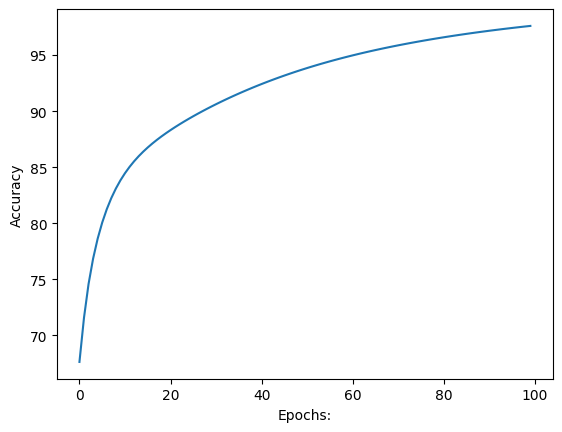

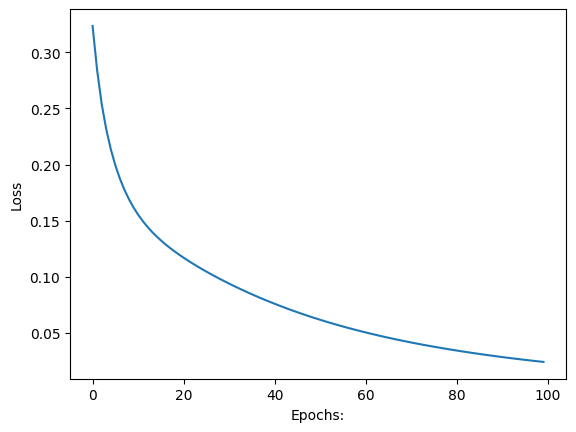

In [7]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

We use the trained weights to predict the letter class for a new input. The class with the highest output value is chosen as the predicted class.

In [ ]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 
# Example: Predicting for letter 'B'	
predict(x[1], w1, w2)

### TODO: conclusion

# **Part 3 - Building bigger models using specialied DL framworks** - 30 minutes ⏰

TODO: Disscuss the limitations for manual Numpy implementations and the advantages of use ML frameworks like JAX and Pytorch.

In [ ]:
# @title Helper code to plot a Sine curve
amplitude = 2
x = np.linspace(0, 2*np.pi, 1000)
y = amplitude*np.sin(x) + np.random.randn(1000)*0.1   # Calculate y values using the sine function
yfit = amplitude*np.sin(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="data", color='red')
plt.plot(x, yfit, label=f'Sine Curve with Amplitude = {amplitude}', color='black')
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()
plt.show()

## 3.1 **Brief Introduction to JAX**
TODO: Import jax and briefly explain similarities and differences with numpy.

## 3.2 **Re-Implemeting our Model in JAX**

TODO: first reimplment our small model with jax then discuss how to scale it and implement a bigger one.
Build a bigger model with more input features for energy prediction dataset.

## 3.3 **Automatic differentiation with JAX**
Discuss how to do gradients computations automatically with JAX

## 3.4 **Training and Evaluation**
TODO: train the bigger model with Jax and analyse the performance.

Congratulations, we've just trained a machine learning model for classification using the popular mnist digit dataset.

**Take home challenge**:
- Are you satisfied with the accuracy of your model?
- What can you do to improve the accuracy of the model?

# **Conclusion**
**Summary:**
- Machine learning is the science of using data to build intelligent systems.
- Deep learning is the subset of machine learning methods that uses neural networks.
- Optimisation is the process of finding the parameters that make the loss of a function as small as possible.
- JAX is a new popular framework that can be used to compute derivatives and train machine learning models.  
- JAX combines Autograd and XLA to perform **accelerated** 🚀 numerical computations. These computations are achieved using transforms such as `jit`,`grad`,`vmap` and `pmap`.
- JAX's `grad` function automatically calculates the gradients of your functions for you!
- Gradient descent is an effective algorithm to learn linear models, but also more complicated models, where analytical solutions don't exist.
- We need to be careful not to over-fit or under-fit on our datasets.


**Next Steps:**

- If you are interested in going deeper into Linear Regression, we have a Bayesian Linear Regression section in the [Bayesian Deep Learning Prac](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Bayesian_Deep_Learning_Prac.ipynb).
- Join the reinforcement learning practicals to taste a different flavour of machine learning.


**References:**

Part 1:
1. "Introduction and Motivation" from [Mathematics for Machine Learning by
Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong (2020).](https://mml-book.github.io/).
2. "Introduction" from [Dive into Deep Learning](https://d2l.ai/).
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning



Part 2:
1. Various JAX [docs](https://jax.readthedocs.io/en/latest/) - specifically [quickstart](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html), [common gotchas](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html), [jitting](
https://jax.readthedocs.io/en/latest/jax-101/02-jitting.html#), [random numbers](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html) and [pmap](https://jax.readthedocs.io/en/latest/jax-101/06-parallelism.html?highlight=pmap#).
2. Previous Indaba Practicals - [Introduction to ML using JAX](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) and [Dive into Machine Learning: Learning by Implementing](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/Intro_ML_English_Prac.ipynb).

Part 3
1. Parts of this section are adapted from [Deepmind's Regression Tutorial](https://github.com/deepmind/educational/blob/master/colabs/summer_schools/intro_to_regression.ipynb).
2. https://d2l.ai/chapter_linear-networks/linear-regression.html
3. https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec06-slides.pdf
4. [Linear Regression Chapter - Mathematics for Machine Learning Book](https://mml-book.github.io/).

For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2024).

# **Appendix:**



## Derivation of partial derivatives for Exercise 2.4

Derive $\frac{\partial \mathcal{L}}{\partial w}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w}
&= \frac{ \partial}{\partial w} \left(\frac{1}{2N} \sum_{i=1}^N \left(y_i - (w x_i + b)\right)^2 \right)
&& \text{(Definition of } \mathcal{L} \text{)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial w} \left(y_i - (w x_i + b)\right)^2
&& \text{(Constant multiple rule)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N 2 \left(y_i - (w x_i + b)\right)(-x_i)
&& \text{(Chain rule)} \\\\
&= \frac{1}{N} \sum_{i=1}^N -x_i \left(y_i - (w x_i + b)\right)
&& \text{(Simplify)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left((w x_i + b) - y_i\right)x_i
&& \text{(Distribute the minus)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left(f(x_i) - y_i\right)x_i
&& \text{(Define } f(x_i) = w x_i + b \text{)}
\end{aligned}



Derive $\frac{\partial \mathcal{L}}{\partial b}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b}
&= \frac{ \partial}{\partial b} \left(\frac{1}{2N} \sum_{i=1}^N \left(y_i - (w x_i + b)\right)^2 \right)
&& \text{(Definition of } \mathcal{L} \text{)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial b} \left(y_i - (w x_i + b)\right)^2
&& \text{(Constant multiple rule)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N 2 \left(y_i - (w x_i + b)\right)(-1)
&& \text{(Chain rule)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left((w x_i + b) - y_i\right)
&& \text{(Simplify)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left(f(x_i) - y_i\right)
&& \text{(Define } f(x_i) = w x_i + b \text{)}
\end{aligned}

# **Feedback**

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/WUpRupqfhFtbLXtN6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

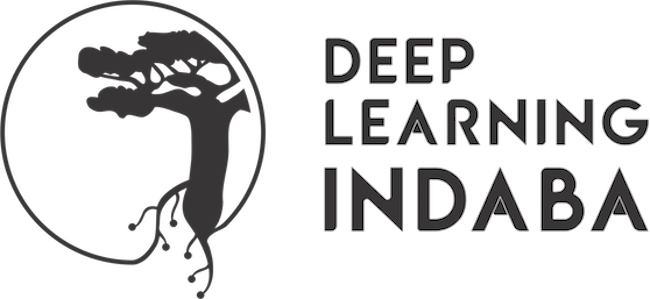